In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./sample_data/qs-world-rankings-2025.csv')

In [4]:
df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [5]:
df.tail()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-
1502,1401+,1401+,Western Washington University,US,United States,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1,-


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   2024 Rank                       1482 non-null   object 
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [7]:
df.isnull().sum()

2025 Rank                           0
2024 Rank                          21
Institution Name                    0
Location                            0
Location Full                       0
Size                                0
Academic Reputation                 0
Employer Reputation                 0
Faculty Student                     0
Citations per Faculty               0
International Faculty             100
International Students             58
International Research Network      1
Employment Outcomes                 0
Sustainability                     19
QS Overall Score                    0
dtype: int64

In [8]:
df['International Faculty'] = df['International Faculty'].fillna(df['International Faculty'].mean())

In [9]:
df['International Students'] = df['International Students'].fillna(df['International Students'].mean())

In [10]:
df['Sustainability'] = df['Sustainability'].fillna(df['Sustainability'].mean())

In [11]:
df.drop(columns='Location',axis=1,inplace=True)

In [12]:
df.drop(columns='2024 Rank',axis=1,inplace=True)

In [13]:
df.columns

Index(['2025 Rank', 'Institution Name', 'Location Full', 'Size',
       'Academic Reputation', 'Employer Reputation', 'Faculty Student',
       'Citations per Faculty', 'International Faculty',
       'International Students', 'International Research Network',
       'Employment Outcomes', 'Sustainability', 'QS Overall Score'],
      dtype='object')

In [14]:
df.shape

(1503, 14)

In [15]:
df.groupby('Size')['2025 Rank'].count()

Size
L     691
M     372
S      88
XL    352
Name: 2025 Rank, dtype: int64

In [16]:
df[df['Location Full'] == 'United States']['2025 Rank'].count()

197

In [17]:
df.groupby('Location Full')['International Students'].mean()

Location Full
Argentina        18.466497
Armenia           1.700000
Australia        63.576316
Austria          72.900000
Azerbaijan        2.733333
                   ...    
United States    23.708938
Uruguay           2.525000
Uzbekistan        3.300000
Venezuela         8.494385
Vietnam           1.283333
Name: International Students, Length: 106, dtype: float64

In [18]:
df.groupby('Location Full')['International Faculty'].mean()

Location Full
Argentina        18.813135
Armenia           5.100000
Australia        80.473684
Austria          86.037500
Azerbaijan       12.300000
                   ...    
United States    23.762315
Uruguay          13.675000
Uzbekistan       57.650000
Venezuela        10.707250
Vietnam          11.050000
Name: International Faculty, Length: 106, dtype: float64

In [19]:
df.groupby('Location Full')['Sustainability'].mean()

Location Full
Argentina         9.202232
Armenia           1.000000
Australia        65.744737
Austria          25.400000
Azerbaijan        9.169766
                   ...    
United States    29.242640
Uruguay           7.227325
Uzbekistan        5.450000
Venezuela         7.702657
Vietnam           8.050000
Name: Sustainability, Length: 106, dtype: float64

In [20]:
df.groupby('Location Full')['Employment Outcomes'].mean().sort_values(ascending=False)

Location Full
Uganda                  98.300000
Malta                   95.900000
Ethiopia                95.500000
Syrian Arab Republic    90.200000
Armenia                 87.400000
                          ...    
Ecuador                 11.290909
Bangladesh              11.220000
Czech Republic          10.856250
Poland                  10.595455
Malaysia                 9.685714
Name: Employment Outcomes, Length: 106, dtype: float64

In [21]:
df.groupby('Location Full')['Academic Reputation'].mean().sort_values(ascending=False)

Location Full
Hong Kong SAR             60.314286
Singapore                 52.775000
Netherlands               44.538462
Sweden                    40.937500
Denmark                   40.400000
                            ...    
Bolivia                    5.100000
Honduras                   5.100000
Bosnia and Herzegovina     4.400000
Morocco                    3.700000
Dominican Republic         2.900000
Name: Academic Reputation, Length: 106, dtype: float64

In [22]:
df.groupby('Location Full')['Employer Reputation'].mean().sort_values()

Location Full
Bosnia and Herzegovina     1.600000
Northern Cyprus            2.100000
Iceland                    2.500000
Bolivia                    2.850000
Armenia                    2.900000
                            ...    
Sweden                    33.712500
Hong Kong SAR             35.414286
Netherlands               39.961538
Singapore                 45.975000
Philippines               46.300000
Name: Employer Reputation, Length: 106, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   object 
 1   Institution Name                1503 non-null   object 
 2   Location Full                   1503 non-null   object 
 3   Size                            1503 non-null   object 
 4   Academic Reputation             1503 non-null   float64
 5   Employer Reputation             1503 non-null   float64
 6   Faculty Student                 1503 non-null   float64
 7   Citations per Faculty           1503 non-null   float64
 8   International Faculty           1503 non-null   float64
 9   International Students          1503 non-null   float64
 10  International Research Network  1502 non-null   float64
 11  Employment Outcomes             1503 non-null   float64
 12  Sustainability                  15

In [24]:
df.groupby('Location Full')['Size'].count().sort_values(ascending=False)

Location Full
United States       197
United Kingdom       90
China (Mainland)     71
Japan                49
Germany              48
                   ... 
Paraguay              1
Iceland               1
Luxembourg            1
Puerto Rico           1
Ethiopia              1
Name: Size, Length: 106, dtype: int64

In [25]:
df.groupby('Location Full')['Citations per Faculty'].mean()

Location Full
Argentina         1.620000
Armenia           1.300000
Australia        60.800000
Austria          18.787500
Azerbaijan        1.233333
                   ...    
United States    30.600508
Uruguay           1.250000
Uzbekistan        1.750000
Venezuela         1.442857
Vietnam          18.583333
Name: Citations per Faculty, Length: 106, dtype: float64

In [26]:
df.groupby('Location Full')['International Research Network'].mean().sort_values(ascending=False)

Location Full
Denmark               91.120000
South Africa          89.663636
Sweden                89.250000
Netherlands           87.576923
Belgium               85.777778
                        ...    
Azerbaijan             9.300000
Kazakhstan             8.261905
Panama                 6.950000
Dominican Republic     4.850000
Kyrgyzstan             3.800000
Name: International Research Network, Length: 106, dtype: float64

In [27]:
df['QS Overall Score'].unique()

array(['100', '98.5', '96.9', '96.8', '96.7', '96.1', '93.9', '93.7',
       '91.6', '90.9', '90.3', '90.1', '88.9', '88.5', '88.4', '87.9',
       '87.6', '87.3', '87.1', '86.5', '86.2', '85.5', '85.2', '84.7',
       '84.1', '83.5', '83.3', '83.2', '83', '82.4', '82.3', '82.1', '82',
       '81.3', '81.2', '81', '80.3', '80.2', '79.8', '79.6', '79', '77.8',
       '77.5', '77.1', '77', '76', '75.7', '75.4', '73.7', '72.9', '72.1',
       '72', '71.6', '71.2', '70.8', '70.7', '70.3', '69.7', '69.5', '69',
       '68.7', '68.2', '67.6', '67.1', '67', '65.7', '65.6', '65.3',
       '65.2', '65', '64.7', '64.1', '63.8', '63.7', '63.5', '62.9',
       '62.4', '61.7', '61.6', '61.5', '61.4', '61.2', '60.6', '60.3',
       '59.9', '59.6', '59.5', '59.4', '59.3', '59.2', '59.1', '58.8',
       '58.5', '58.3', '58.2', '58.1', '57.9', '57.3', '57.2', '57.1',
       '56.8', '56.3', '56.1', '55.8', '55.7', '55.5', '55.2', '55',
       '54.8', '54.5', '54.4', '54.3', '54.2', '54.1', '53', '54', '

In [28]:
df.groupby('Location Full')['2025 Rank'].count()

Location Full
Argentina         25
Armenia            1
Australia         38
Austria            8
Azerbaijan         3
                ... 
United States    197
Uruguay            4
Uzbekistan         2
Venezuela          7
Vietnam            6
Name: 2025 Rank, Length: 106, dtype: int64

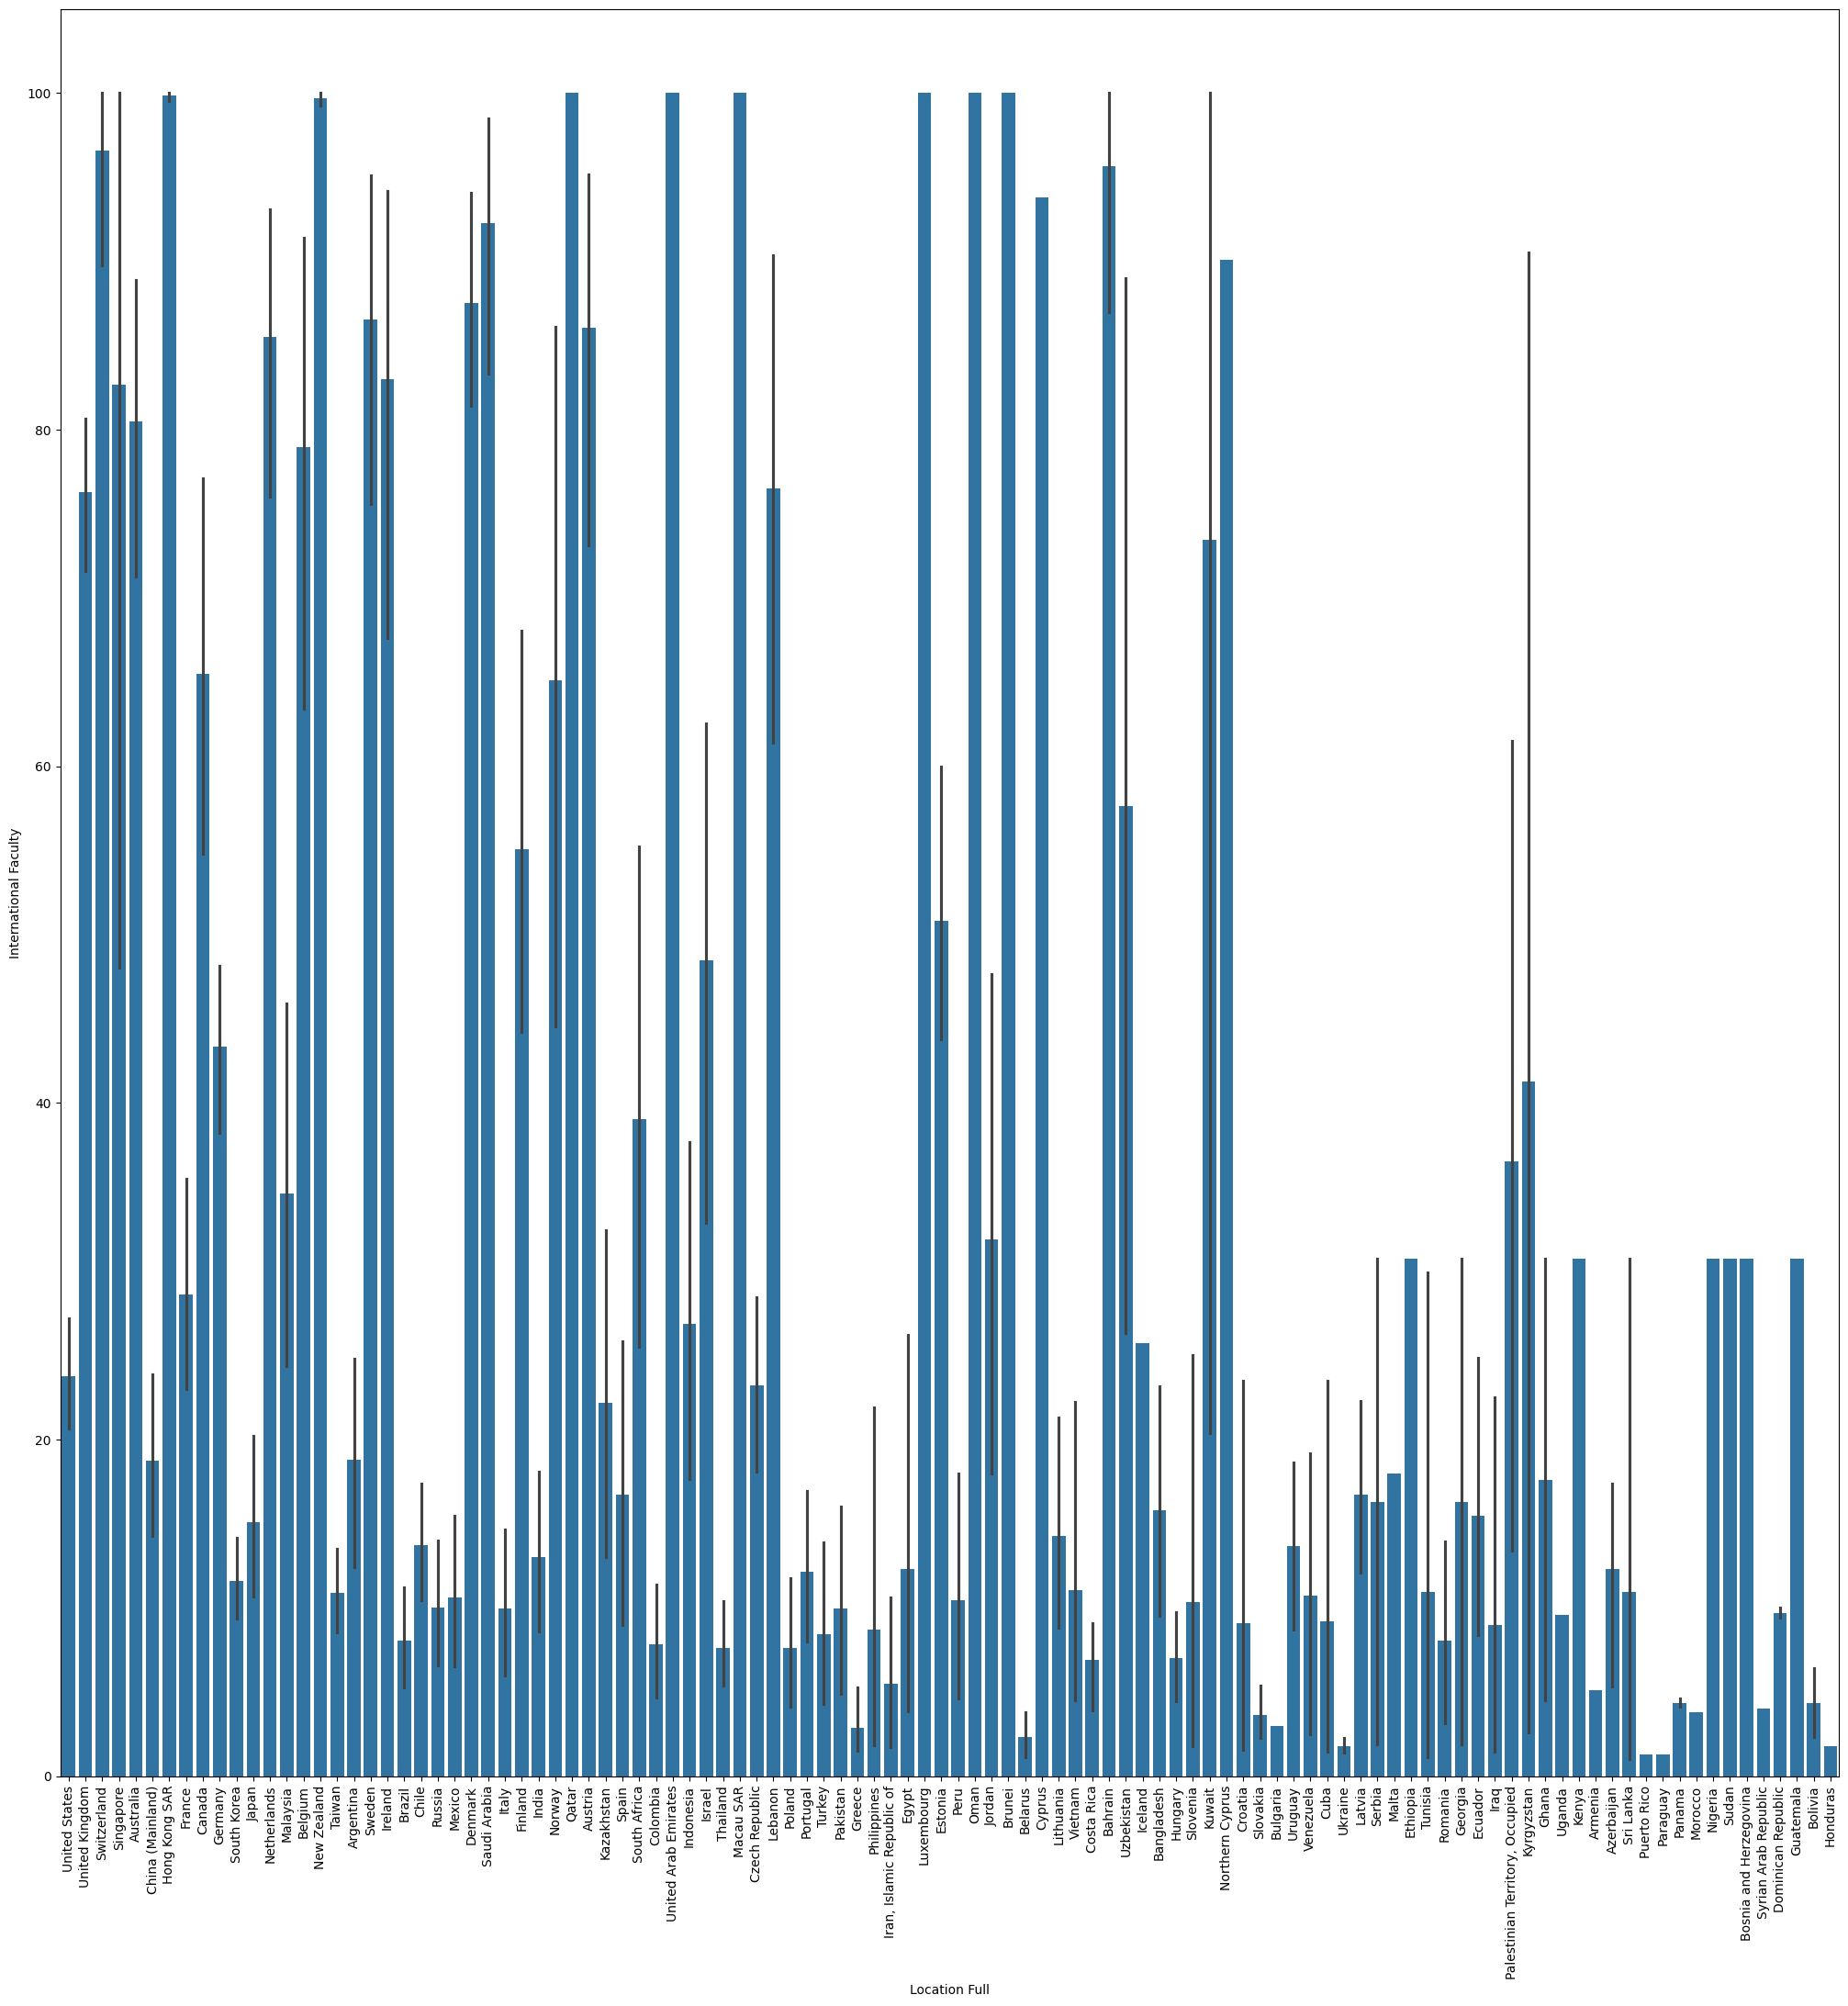

In [29]:
plt.figure(figsize=(25,25))
sns.barplot(x='Location Full',y='International Faculty',data=df)
plt.xticks(rotation=90)
plt.show()